<a href="https://colab.research.google.com/github/parthatom/UnsupervisedClassification/blob/master/UnsupervisedClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Unzip Data

In [2]:
!ls drive/"My Drive"/Data

conf1.pth  final.zip	      MNIST-kaggle
conf2.pth  HAM10000	      models
conf3.pth  Heart_Disease_UCI  satellite-images-of-hurricane-damage.zip


In [3]:
!unzip /content/drive/"My Drive"/Data/satellite-images-of-hurricane-damage.zip -d data

Archive:  /content/drive/My Drive/Data/satellite-images-of-hurricane-damage.zip
  inflating: data/test/damage/-93.548123_30.900623.jpeg  
  inflating: data/test/damage/-93.560128_30.894917.jpeg  
  inflating: data/test/damage/-93.578271_30.779923999999998.jpeg  
  inflating: data/test/damage/-93.590598_30.694956.jpeg  
  inflating: data/test/damage/-93.604017_30.793719.jpeg  
  inflating: data/test/damage/-93.6141_30.754263.jpeg  
  inflating: data/test/damage/-93.618483_30.730039.jpeg  
  inflating: data/test/damage/-93.65613_30.076164000000002.jpeg  
  inflating: data/test/damage/-93.658785_30.206929.jpeg  
  inflating: data/test/damage/-93.659161_30.202384999999996.jpeg  
  inflating: data/test/damage/-93.65936500000001_30.138793.jpeg  
  inflating: data/test/damage/-93.659805_30.138094.jpeg  
  inflating: data/test/damage/-93.660431_30.20485.jpeg  
  inflating: data/test/damage/-93.661241_30.212164.jpeg  
  inflating: data/test/damage/-93.66200400000001_30.201602.jpeg  
  inflating

### Imports

In [0]:
import torch
import torchvision
import sys
import os
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from pathlib import Path
import sklearn
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
colors = ['y', 'r']

In [0]:
from sklearn import model_selection
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import mixture
import torchvision.transforms as transforms
from torchvision import models

In [0]:
import time

In [0]:
data_path = Path('/','content','data')
train_path = Path(data_path, 'train_another')
test_path =  Path(data_path,'test_another')
validation_path =  Path(data_path,'validation_another')

In [31]:
print(len(os.listdir(os.path.join(train_path,"damage"))), len(os.listdir(os.path.join(test_path, "damage"))), len(os.listdir(os.path.join(validation_path,"damage"))) )
print(len(os.listdir(os.path.join(train_path,"no_damage"))), len(os.listdir(os.path.join(test_path, "no_damage"))), len(os.listdir(os.path.join(validation_path,"no_damage"))) )

5000 8000 1000
5000 1000 1000


## Heart Disease Classification

### Data

In [0]:
df_train = pd.read_csv(os.path.join(data_path,"heart.csv"))
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
df_train['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
pos = df_train[df_train['target']==1]
total_male_pos = len(pos[pos['sex']==1])
neg = df_train[df_train['target']==0]
total_male_neg = len(neg[neg['sex']==1])
print(total_male_neg, total_male_pos)
pos = df_train[df_train['target']==1]
total_female_pos = len(pos[pos['sex']==0])
neg = df_train[df_train['target']==0]
total_female_neg = len(neg[neg['sex']==0])
print(total_female_neg, total_female_pos)

114 93
24 72


In [0]:
df = df_train.copy()
df = df.drop(['target'], axis = 1)

In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [0]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
      if(feature_name == 'sex'):
        pass
      else:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
df = normalize(df)

In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df,df_train['target'].values, test_size = 0.4, shuffle = True, random_state = 42)

In [0]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
284,0.666667,1,0.0,0.433962,0.184932,0.0,0.0,0.511450,1.0,0.306452,1.0,0.25,1.000000
198,0.687500,1,0.0,0.245283,0.321918,0.0,0.5,0.213740,1.0,0.290323,0.5,0.50,1.000000
42,0.333333,1,0.0,0.094340,0.187215,0.0,0.0,0.587786,1.0,0.483871,0.5,0.00,0.666667
17,0.770833,0,1.0,0.528302,0.228311,0.0,0.5,0.328244,0.0,0.419355,0.0,0.00,0.666667
168,0.708333,1,0.0,0.339623,0.292237,0.0,0.0,0.580153,0.0,0.225806,0.5,0.25,1.000000


In [0]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.528646,0.680147,0.324755,0.346941,0.273654,0.147059,0.270221,0.605607,0.323529,0.168050,0.707721,0.183824,0.769608
std,0.190133,0.467279,0.340525,0.157322,0.117300,0.354817,0.264008,0.168366,0.468685,0.186033,0.303812,0.259924,0.204559
min,0.000000,0.000000,0.000000,0.000000,0.011416,0.000000,0.000000,0.129771,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390625,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.511450,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.259132,0.000000,0.500000,0.633588,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.337900,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,0.924528,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X_train.iloc[0].values

array([0.66666667, 1.        , 0.        , 0.43396226, 0.18493151,
       0.        , 0.        , 0.51145038, 1.        , 0.30645161,
       1.        , 0.25      , 1.        ])

### KMeans

In [0]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state = 42)
kmeans = model.fit(X_train)
y_pred_train = kmeans.labels_
y_pred_test = kmeans.predict(X_test)
train_accuracy = np.mean((y_pred_train == y_train).astype('float32'))
test_accuracy = np.mean((y_pred_test == y_test).astype('float32'))
print(f'train accuracy {train_accuracy*100:.3f}')
print(f'test accuracy {test_accuracy*100:.3f}')

train accuracy 72.059
test accuracy 70.968


In [0]:
y_pred_test

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [0]:
transform_train = model.transform(X_train)
transform_train.shape

(272, 2)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['y', 'r']

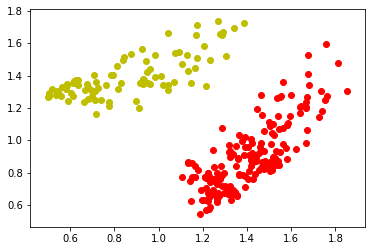

In [0]:
for i in range(len(transform_train)):
  plt.scatter(transform_train[i][0], transform_train[i][1], c=colors[y_pred_train[i]])
plt.show()

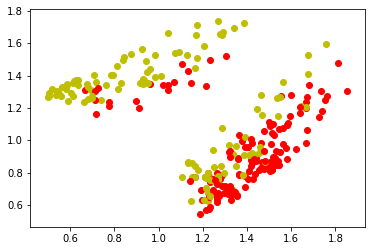

In [0]:
for i in range(len(transform_train)):
  plt.scatter(transform_train[i][0], transform_train[i][1], c=colors[y_train[i]])
plt.show()

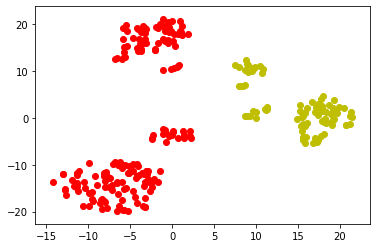

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42).fit_transform(X_train)
for i in range(len(transform_train)):
  plt.scatter(tsne[i][0], tsne[i][1], c=colors[y_pred_train[i]])
plt.show()

In [0]:
tsne.shape

(272, 2)

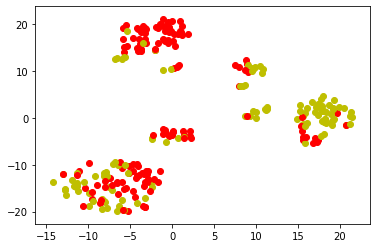

In [0]:
for i in range(len(transform_train)):
  plt.scatter(tsne[i][0], tsne[i][1], c=colors[y_train[i]])
plt.show(y_pred_train = kmeans.labels_)

In [0]:
len(X_train.columns)

13

In [0]:
class dataset(Dataset):
  def __init__(self,df,y):
    self.df = df
    self.y = y
    self.indices = self.df.index
  def __len__(self):
    return len(self.df)
  def __getitem__(self,index):
    feature_vec = torch.from_numpy(self.df.iloc[self.indices(index)].values)
    target = self.y[index]
    return (feature_vec, target)

### Autoencoder Learning

In [0]:
class AutoEncoder(nn.Module):
  
  def __init__(self):
    super(AutoEncoder,self).__init__()
    self.encoder = nn.Sequential(nn.Linear(13,5),nn.ReLU(),nn.Linear(5,2),nn.ReLU())
    self.decoder = nn.Sequential(nn.Linear(2,5),nn.ReLU(),nn.Linear(5, 13),nn.ReLU())
    self.encoding = torch.rand((2,5)) 
  
  def get_encoding(self,x):
    b = self.forward(x)
    return self.encoding

  def forward(self, x):
    self.encoding = self.encoder(x)
    x = self.decoder(self.encoding)
    return x

In [0]:
model = AutoEncoder()

In [0]:
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=2, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=13, bias=True)
    (3): ReLU()
  )
)


In [0]:
train_data = dataset(X_train, y_train)
test_data = dataset(X_test, y_test)

In [0]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = True)

In [0]:
X_train.values.astype('float')

array([[0.66666667, 1.        , 0.        , ..., 1.        , 0.25      ,
        1.        ],
       [0.6875    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.33333333, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       ...,
       [0.83333333, 1.        , 1.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.35416667, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.70833333, 0.        , 0.33333333, ..., 1.        , 0.5       ,
        0.66666667]])

In [0]:
epochs = 10
alpha = [0.001]
loss_lists = []
val_loss_lists = []
criterion = nn.MSELoss()
for lr in alpha:
  optimizer = torch.optim.Adam(model.parameters(), lr = lr)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  for e in range(epochs):
    loss_list = []
    val_losses = []
    running_loss = 0
    model.train()
    X = torch.from_numpy(X_train.values.astype('float32')).to(device)
    y = X
    ps = model(X)
    loss = criterion(ps, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
        
    with torch.no_grad():
      model.eval()          
      valing_loss = 0
      X_val = torch.from_numpy(X_test.values.astype('float32')).to(device)
      y = X_val
      ps = model(X_val)
      valloss = criterion(ps,y)
      valing_loss += valloss.item()
      val_losses.append(valing_loss)
      loss_list.append(running_loss)
      print(f"Epoch: {e+1}/{epochs}...")
      print(f"Training loss: {running_loss/len(X):.3f}")
      print(f"Validation loss: {valing_loss/len(X):.3f}")        
  loss_lists.append(loss_list)
  val_loss_lists.append(val_losses)

Epoch: 1/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 2/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 3/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 4/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 5/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 6/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 7/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 8/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 9/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 10/10...
Training loss: 0.001
Validation loss: 0.001


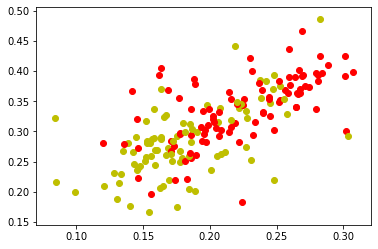

In [0]:
X = torch.from_numpy(X_train.values.astype('float32'))
encoding_train = model.get_encoding(X).detach().numpy()
for i in range(len(encoding_train)):
  plt.scatter(encoding_train[i][0], encoding_train[i][1], c=colors[y_train[i]])
plt.show()

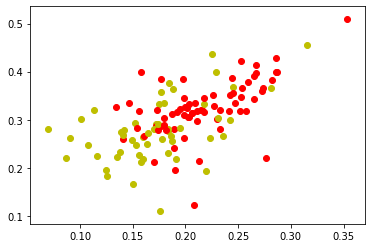

In [0]:
X_val = torch.from_numpy(X_test.values.astype('float32'))
encoding_val = model.get_encoding(X_val).detach().numpy()
for i in range(len(encoding_val)):
  plt.scatter(encoding_val[i][0], encoding_val[i][1], c=colors[y_test[i]])
plt.show()

## Satellite Image Hurricane Damage

### Loading Data

In [0]:
def flatten(tensor):
  return tensor.resize(-1,1)

In [0]:
train_data = torchvision.datasets.ImageFolder(train_path, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize([0, 0, 0], [1,1,1])]))
val_data = torchvision.datasets.ImageFolder(validation_path, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize([0, 0, 0], [1,1,1])]))
train_loader = DataLoader(train_data, batch_size = 64, shuffle = True)
val_loader = DataLoader(val_data, batch_size = 64, shuffle = True)

In [0]:
train_data_kmeans = torchvision.datasets.ImageFolder(train_path, transform=transforms.Compose([transforms.ToTensor(),
                                                                                              transforms.Lambda(flatten)]))
val_data_kmeans = torchvision.datasets.ImageFolder(validation_path, transform=transforms.Compose([transforms.ToTensor(),
                                                                                                transforms.Lambda(flatten)]))
train_loader_kmeans = DataLoader(train_data, batch_size = 10000, shuffle = True)
val_loader_kmeans = DataLoader(val_data, batch_size = 50, shuffle = True)

torch.Size([64, 3, 128, 128]) tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])


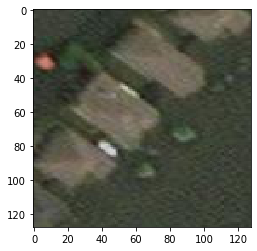

In [36]:
%matplotlib inline
image, label = next(iter(train_loader))
trans = transforms.ToPILImage()
print(image.shape, label)
img = trans(image[0])
plt.imshow(img)

### K Means Clustering

In [0]:
accuracy_list = []
pca = PCA(n_components=100, random_state = 42)
model = KMeans(n_clusters = 2, random_state = 42)
y_pred_train = None
time_means_start = time.time()
for i,(img, label) in enumerate(train_loader_kmeans):
  X = img.view(-1, 3*128*128)
  X = pca.fit_transform(X)
  kmeans = model.fit(X)
  # y_pred_test = kmeans.predict(X_test)
  y_pred_train = kmeans.labels_
  train_accuracy = torch.mean((torch.from_numpy(kmeans.labels_) == label).type(torch.FloatTensor))
  # print(train_accuracy)
  accuracy_list.append(train_accuracy)
  print(f'time elapsed after {i+1} = {time.time()-time_means_start}')
# test_accuracy = np.mean((y_pred_test == y_test).astype('float32'))
# print(f'train accuracy {train_accuracy*100:.3f}')
# print(f'test accuracy {test_accuracy*100:.3f}')

time elapsed after 1 = 104.86077165603638


In [0]:
print(X.shape, i, y_pred_train.shape)

(10000, 100) 0 (10000,)


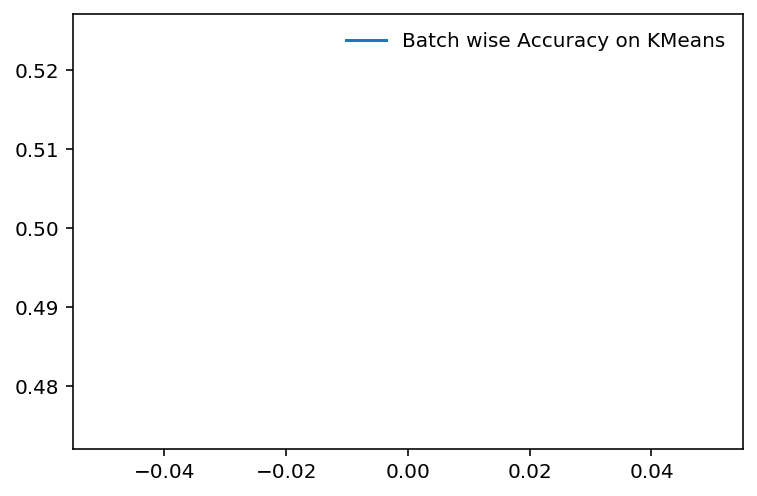

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.plot(accuracy_list, label='Batch wise Accuracy on KMeans')
plt.legend(frameon=False)

In [0]:
len(accuracy_list)

1

In [0]:
print("Max accuracy",torch.max(torch.FloatTensor(accuracy_list)))
print("Min accuracy", torch.min(torch.FloatTensor(accuracy_list)))
print("Average accuracy", torch.mean(torch.FloatTensor(accuracy_list)))

Max accuracy tensor(0.5026)
Min accuracy tensor(0.5000)
Average accuracy tensor(0.5013)


1th epoch done. Time collapsed =1.1704037189483643
2th epoch done. Time collapsed =2.238990068435669
3th epoch done. Time collapsed =3.3453261852264404
4th epoch done. Time collapsed =4.453009128570557
5th epoch done. Time collapsed =5.574452638626099
6th epoch done. Time collapsed =6.6782355308532715
7th epoch done. Time collapsed =7.806871175765991
8th epoch done. Time collapsed =8.950522899627686
9th epoch done. Time collapsed =10.060526132583618
10th epoch done. Time collapsed =11.194416999816895
11th epoch done. Time collapsed =12.512123107910156
12th epoch done. Time collapsed =13.72248649597168
13th epoch done. Time collapsed =14.86287546157837
14th epoch done. Time collapsed =16.036011695861816
15th epoch done. Time collapsed =17.21120285987854
16th epoch done. Time collapsed =18.43433952331543
17th epoch done. Time collapsed =19.610715627670288
18th epoch done. Time collapsed =20.838926553726196
19th epoch done. Time collapsed =22.06176519393921
20th epoch done. Time collapsed

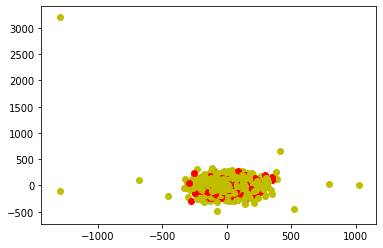

In [0]:
time_start = time.time()
for j,(img, label) in enumerate(train_loader_kmeans):
  X = img.view(-1, 3*128*128)
  tsne = TSNE(random_state = 42).fit_transform(X)
  for i in range(len(tsne)):
    plt.scatter(tsne[i][0], tsne[i][1], c=colors[kmeans.labels_[i]])
  print(f'{j+1}th epoch done. Time collapsed ={time.time()-time_start}')
plt.show()

In [0]:
X.shape

torch.Size([32, 49152])

In [0]:
tsne.shape

(32, 2)

In [0]:
image, label = next(iter(train_loader_kmeans))
X = image.view(-1, 3*128*128)
tsne = TSNE(random_state = 42).fit_transform(X)
for i in range(len(transform_train)):
  plt.scatter(tsne[i][0], tsne[i][1], c=colors[label[i]])
plt.show()

In [0]:
print(pca.explained_variance_ratio_)

[0.26905311 0.05189861 0.0457334  0.03993505 0.02383568 0.02077913
 0.01865438 0.01773177 0.01551881 0.01382406 0.01308916 0.01179624
 0.01077164 0.00972204 0.00962177 0.00909479 0.00891382 0.00795455
 0.0078399  0.00726821 0.00685245 0.00635861 0.00632284 0.00583261
 0.00550813 0.00519287 0.00505296 0.00496425 0.00464915 0.00444295
 0.00437559 0.00418442 0.00410081 0.00394    0.00379093 0.0036406
 0.00358475 0.00344363 0.00324816 0.00315713 0.00306582 0.00294059
 0.00290009 0.00285911 0.00274836 0.00271082 0.00263337 0.00259129
 0.00238723 0.00237398 0.00227446 0.00221871 0.00218352 0.0021439
 0.00209601 0.00206423 0.00200785 0.00195976 0.00191732 0.00183389
 0.00182468 0.00176213 0.00170114 0.00168493 0.00167168 0.00165134
 0.00161443 0.00156009 0.0015369  0.00149486 0.00147203 0.0014319
 0.00142492 0.00141431 0.00139674 0.0013648  0.00135603 0.00132623
 0.00130371 0.00127454 0.00124752 0.00124155 0.00118872 0.00117161
 0.00114905 0.00113481 0.0011232  0.00111039 0.00110791 0.0010839

In [0]:
accuracy_list = []
pca = PCA(n_components=32, random_state = 42)
model = MiniBatchKMeans(n_clusters = 2, random_state = 42, batch_size = 50)
for i,(img, label) in enumerate(train_loader_kmeans):
  X  = img.view(-1,3*128*128)
  X = pca.fit_transform(X)
  kmeans = model.partial_fit(X)
  # y_pred_test = kmeans.predict(X_test)
  train_accuracy = torch.mean((torch.from_numpy(kmeans.labels_) == label).type(torch.FloatTensor))
  # print(train_accuracy)
  accuracy_list.append(train_accuracy)
# test_accuracy = np.mean((y_pred_test == y_test).astype('float32'))
# print(f'train accuracy {train_accuracy*100:.3f}')
# print(f'test accuracy {test_accuracy*100:.3f}')

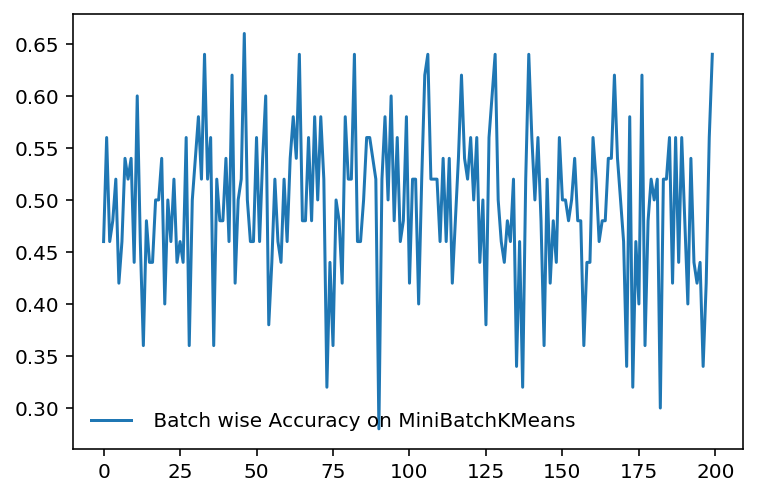

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.plot(accuracy_list, label=' Batch wise Accuracy on MiniBatchKMeans')
plt.legend(frameon=False)

In [0]:
print("Max Accuracy",torch.max(torch.FloatTensor(accuracy_list)))
print("Min Accuracy", torch.min(torch.FloatTensor(accuracy_list)))
print("Average Accuracy", torch.mean(torch.FloatTensor(accuracy_list)))

Max Accuracy tensor(0.6600)
Min Accuracy tensor(0.2800)
Average Accuracy tensor(0.4957)


In [0]:
print(pca.explained_variance_ratio_)

[0.19404046 0.08037692 0.06951054 0.05240931 0.04662364 0.04093731
 0.03768031 0.03427887 0.03068895 0.02974583 0.02492854 0.0218313
 0.0210193  0.01979494 0.01908831 0.01767043 0.01684818 0.01602691
 0.01398993 0.01322079 0.01300683 0.0118115  0.01163284 0.01083287
 0.01034792 0.01001836 0.00954337 0.00930282 0.00894828 0.00804926
 0.00776126 0.00741169]


In [0]:
image, label = next(iter(train_loader_kmeans))
print(image.view(-1,3*128*128).shape, label)
model = MiniBatchKMeans(n_clusters = 2, random_state = 42, batch_size = 32)
pca = PCA(n_components=30)
X = image.view(-1, 3*128*128)
X = pca.fit_transform(X)
print(X.shape)
kmeans = model.partial_fit(X)
# y_pred_train = (kmeans.labels_)
# y_pred_train
torch.mean((torch.from_numpy(y_pred_train) == label).type(torch.FloatTensor))

torch.Size([32, 49152]) tensor([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 1])
(32, 30)


### AutoEncoder Clustering

#### Model

In [0]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoding = None
    vggnet = models.vgg16_bn(pretrained = True)    
    vnet = nn.Sequential(*list(vggnet.children()))    
    vnet[1] = nn.Sequential(nn.Conv2d(512,256,3))
    vnet[2] = nn.Sequential(nn.AdaptiveAvgPool2d((3,3)))
    self.Conv1 = nn.Sequential(vnet)
    self.fc1 = nn.Sequential(nn.Linear(2304, 128), 
                             nn.Dropout(p=0.5), 
                             nn.ReLU(),
                             nn.Linear(128, 32),
                             nn.Dropout(p =0.5),
                             nn.ReLU(),
                             nn.Linear(32,2),
                             nn.LogSoftmax(dim = 1))
    self.fc2 = nn.Sequential(nn.Linear(2, 32),                              
                             nn.ReLU(),
                             nn.Linear(32, 128),
                             nn.Dropout(p =0.5),
                             nn.ReLU(),
                             nn.Linear(128,2304),
                             nn.Dropout(p=0.5),
                             nn.ReLU())
    self.Conv2 = nn.Sequential(nn.Conv2d(256, 512, kernel_size = 3, stride = 1, padding =1),
                               nn.ReLU(), 
                               nn.Upsample(scale_factor=2, mode = 'nearest'),

                               nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                               nn.ReLU(), 
                               nn.Upsample(scale_factor=2, mode = 'nearest'),

                               nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                               nn.ReLU(),

                               nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                               nn.ReLU(),

                               nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                               nn.ReLU(),                               
                               nn.Upsample(scale_factor=2, mode = 'nearest'),

                               nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                               nn.ReLU(), 

                               nn.Conv2d(512, 256, 3, stride = 1, padding = 1),
                               nn.ReLU(), 

                               nn.Conv2d(256, 256, 3, stride = 1, padding = 1),
                               nn.ReLU(), 
                               nn.Upsample(scale_factor=2, mode = 'nearest'),
                               
                               nn.Conv2d(256, 256, 3, stride = 1, padding = 1),
                               nn.ReLU(), 

                               nn.Conv2d(256, 128, 3, stride = 1, padding = 1),
                               nn.ReLU(), 

                               nn.Conv2d(128, 128, 3, stride = 1, padding = 1),
                               nn.ReLU(),
                               nn.Upsample(scale_factor=2, mode = 'nearest'),

                               nn.Conv2d(128, 64, 3, stride = 1, padding = 1),
                               nn.ReLU(), 

                               nn.Conv2d(64, 64, 3, stride = 1, padding = 1),
                               nn.ReLU(), 
                               nn.Upsample(scale_factor=2, mode = 'nearest'),
                               
                               nn.Conv2d(64, 3, 3, stride = 1, padding = 1),
                               nn.ReLU(),
                               
                               nn.AdaptiveAvgPool2d(output_size=(128,128)))
  def get_encoding(self, X):
    X = self.Conv1(X)
    X = X.view(-1,2304)
    encoding = self.fc1(X)
    # encoding = nn.LogSoftmax(dim=1)(encoding)
    return encoding  

  def forward(self, X):
    X =self.Conv1(X)
    X = X.view(-1, 2304)
    encoding = self.fc1(X)
    X = self.fc2(encoding)
    X = X.view(-1,256,3,3)
    X = self.Conv2(X)
    return X

In [0]:
# alexnet = models.vgg16_bn(pretrained = False)
# vnet = nn.Sequential(*list(alexnet.children()))
# vnet[1] = nn.Sequential(nn.Conv2d(512,256,3))
# vnet[2] = nn.Sequential(nn.AdaptiveAvgPool2d((3,3)))
# vnet

In [0]:
autoencoder = Autoencoder()
model_path = Path('drive','My Drive','Data','models','satellite_damage')
# autoencoder

#### Training

In [39]:
loss_list = []
val_losses = []
criterion = nn.MSELoss()
epochs = 10
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = 0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder.to(device)
time_encoder_start = time.time()
for e in range(epochs):
    running_loss = 0
    accuracy = 0
    autoencoder.train()
    for i,(images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        ps = autoencoder(images)
        loss = criterion(ps, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
        running_loss += loss.item() 
        if(i%25 == 0):
          print(f'{i+1} batches done')       
    else:
        with torch.no_grad():
          autoencoder.eval()
          valing_loss = 0
          for images, labels in val_loader:
            images = images.to(device)
            labels =  labels.to(device)
            ps = autoencoder(images)
            valloss = criterion(ps, images)            
            valing_loss += valloss.item()
          val_losses.append(valing_loss)
          loss_list.append(running_loss)
          print(f"Epoch: {e+1}/{epochs}...")
          print(f"Training loss: {running_loss/len(train_loader):.3f}")
          print(f"Validation loss: {valing_loss/len(val_loader):.3f}")
          print(f'Time elapsed ={time.time()-time_encoder_start:.3f}')
          
          torch.save(autoencoder,os.path.join(model_path, 'autoencoder_vgg_16_bn_encoder_decoder'+'epoch'+str(e)+'lr=0.003.pth'))

1 batches done


KeyboardInterrupt: ignored

#### Evaluation

torch.Size([64, 3, 128, 128]) tensor([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])


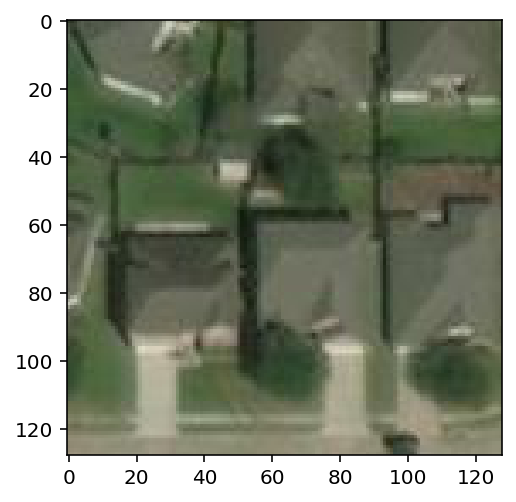

In [0]:
%matplotlib inline
image, label = next(iter(train_loader))
trans = transforms.ToPILImage()
print(image.shape, label)
img = trans(image[0])
plt.imshow(img)

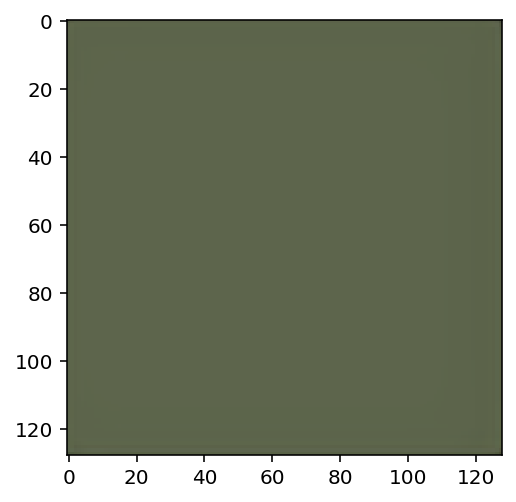

In [0]:
# autoencoder = torch.load(os.path.join(model_path, 'autoencoder_vgg_16_bnepoch9lr0.003.pth'))
autoencoder = autoencoder.eval().cpu()
img = autoencoder(image)
img = trans(img[0])
plt.imshow(img)

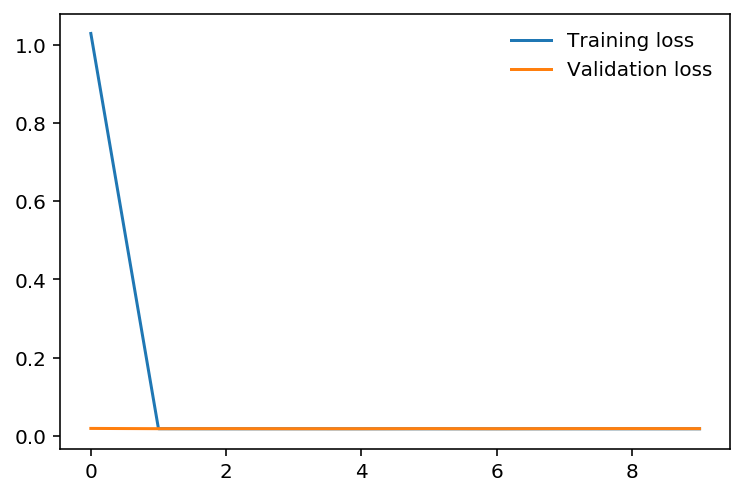

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.plot(np.asarray(loss_list)/len(train_loader), label='Training loss')
plt.plot(np.asarray(val_losses)/len(val_loader), label='Validation loss')
plt.legend(frameon=False)

1th batch done time elapsed = 0.689s
2th batch done time elapsed = 1.276s
3th batch done time elapsed = 1.838s
4th batch done time elapsed = 2.400s
5th batch done time elapsed = 3.625s
6th batch done time elapsed = 4.203s
7th batch done time elapsed = 4.770s
8th batch done time elapsed = 5.333s
9th batch done time elapsed = 5.899s
10th batch done time elapsed = 6.484s
11th batch done time elapsed = 7.070s
12th batch done time elapsed = 7.660s
13th batch done time elapsed = 8.270s
14th batch done time elapsed = 8.888s
15th batch done time elapsed = 9.502s
16th batch done time elapsed = 10.109s
17th batch done time elapsed = 10.750s
18th batch done time elapsed = 11.406s
19th batch done time elapsed = 12.055s
20th batch done time elapsed = 12.695s
21th batch done time elapsed = 13.315s
22th batch done time elapsed = 13.963s
23th batch done time elapsed = 14.797s
24th batch done time elapsed = 15.479s
25th batch done time elapsed = 16.137s
26th batch done time elapsed = 16.806s
27th batch

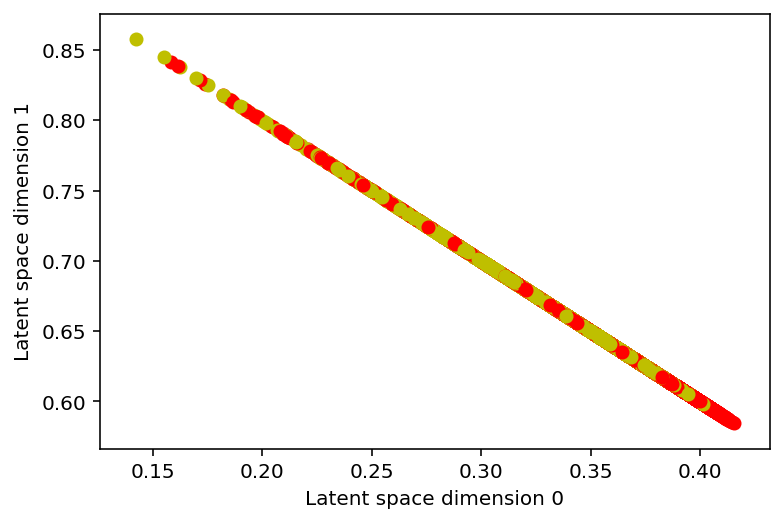

In [0]:
time_embedding = time.time()
autoencoder.eval()
autoencoder.cuda()
for j, (X, label) in enumerate(train_loader):
  X = X.to(device)
  label = label.to(device)
  encoding_train = torch.exp(autoencoder.get_encoding(X).detach()).cpu().numpy()
  for i in range(len(encoding_train)):
    plt.scatter(encoding_train[i][0], encoding_train[i][1], c=colors[label[i]])
  print(f'{j+1}th batch done time elapsed = {time.time()-time_embedding:.3f}s')
plt.xlabel('Latent space dimension 0')
plt.ylabel('Latent space dimension 1')
plt.show()

In [0]:
model_path = Path('drive','My Drive','Data','models','satellite_damage')
time_embedding = time.time()
accuracy = 0
# autoencoder = torch.load(os.path.join(model_path,'autoencoder_vgg_16'+'epoch'+'9'+'lr=0.003.pth'))
autoencoder.eval()
autoencoder.cuda()
m = torch.Tensor(0)
m = m.cuda()
for j, (X, label) in enumerate(train_loader):
  X = X.to(device)
  label = label.to(device)
  encoding_train = torch.exp(autoencoder.get_encoding(X))
  y_pred = torch.argmax(encoding_train.type(torch.LongTensor), dim = 1).cuda()
  m = torch.mean((y_pred==label).type(torch.FloatTensor))
  m = m.cpu()
  accuracy+= m
  print(f'{j+1}th batch done time elapsed = {time.time()-time_embedding:.3f}s')
print(f'accuracy = {(accuracy/len(train_loader)*100):.3f}%')

1th batch done time elapsed = 0.341s
2th batch done time elapsed = 0.633s
3th batch done time elapsed = 0.919s
4th batch done time elapsed = 1.210s
5th batch done time elapsed = 1.493s
6th batch done time elapsed = 1.776s
7th batch done time elapsed = 2.063s
8th batch done time elapsed = 2.347s
9th batch done time elapsed = 2.632s
10th batch done time elapsed = 2.917s
11th batch done time elapsed = 3.200s
12th batch done time elapsed = 3.487s
13th batch done time elapsed = 3.774s
14th batch done time elapsed = 4.052s
15th batch done time elapsed = 4.341s
16th batch done time elapsed = 4.624s
17th batch done time elapsed = 4.919s
18th batch done time elapsed = 5.205s
19th batch done time elapsed = 5.494s
20th batch done time elapsed = 5.789s
21th batch done time elapsed = 6.072s
22th batch done time elapsed = 6.359s
23th batch done time elapsed = 6.658s
24th batch done time elapsed = 6.952s
25th batch done time elapsed = 7.238s
26th batch done time elapsed = 7.525s
27th batch done time 

In [0]:
y_pred.shape

torch.Size([2])

In [0]:
encoding_train.shape

(16, 2)

In [0]:
X, label = next(iter(train_loader))
print(X.shape)
alexnet = models.alexnet(pretrained = False)
Conv1 = nn.Sequential(*list(alexnet.children()))[0]
X1 = Conv1(X)
print(X1.shape)

torch.Size([32, 3, 128, 128])
torch.Size([32, 256, 3, 3])


### Classifier (Supervised)

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super(Classifier, self).__init__()
    self.encoding = None
    alexnet = models.alexnet(pretrained = False)
    self.Conv1 = nn.Sequential(*list(alexnet.children()))[0]
    self.fc1 = nn.Sequential(nn.Linear(2304, 128), 
                            #  nn.Dropout(p=0.5), 
                             nn.ReLU(),
                             nn.Linear(128, 32),
                            #  nn.Dropout(p =0.5),
                             nn.ReLU(),
                             nn.Linear(32,2),
                             nn.LogSoftmax(dim = 1))
  def forward(self, X):
    X =self.Conv1(X)
    X = X.view(-1, 2304)
    encoding = self.fc1(X)
    return encoding

In [0]:
classifier = Classifier()

In [0]:
loss_list = []
val_losses = []
criterion = nn.NLLLoss()
epochs = 10
model_path = Path('drive','My Drive','Data','models','satellite_damage')
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = 0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier.to(device)
time_encoder_start = time.time()
for e in range(epochs):
    running_loss = 0
    accuracy = 0
    classifier.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        ps = classifier(images)
        loss = criterion(ps, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()        
    else:
        with torch.no_grad():
          classifier.eval()
          valing_loss = 0
          for images, labels in val_loader:
            images = images.to(device)
            labels =  labels.to(device)
            ps = classifier(images)
            valloss = criterion(ps, labels)            
            valing_loss += valloss.item()
          val_losses.append(valing_loss)
          loss_list.append(running_loss)
          print(f"Epoch: {e+1}/{epochs}...")
          print(f"Training loss: {running_loss/len(train_loader):.3f}")
          print(f"Validation loss: {valing_loss/len(val_loader):.3f}")
          print(f'Time elapsed ={time.time()-time_encoder_start:.3f}')
          torch.save(classifier,os.path.join(model_path, 'classifier'+'epoch'+str(e)+'lr=0.003.pth'))

Epoch: 1/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =21.838


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Classifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/d

Epoch: 2/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =43.243
Epoch: 3/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =65.161
Epoch: 4/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =86.904
Epoch: 5/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =108.495
Epoch: 6/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =130.341
Epoch: 7/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =152.055
Epoch: 8/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =173.596
Epoch: 9/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =195.178
Epoch: 10/10...
Training loss: 0.695
Validation loss: 0.695
Time elapsed =217.062


In [0]:
model_path = Path('drive','My Drive','Data','models','satellite_damage')
time_embedding = time.time()
accuracy = 0
# autoencoder = torch.load(os.path.join(model_path,'autoencoder'+'epoch'+'9'+'lr=0.003.pth'))
classifier.eval()
classifier.cpu()
for j, (X, label) in enumerate(train_loader):
  X = X.cpu()
  label = label.cpu()
  encoding_train = torch.exp(classifier(X))
  y_pred = torch.argmax(encoding_train.type(torch.LongTensor), dim = 1)
  m = torch.mean((y_pred==label).type(torch.FloatTensor))
  m = m.cpu()
  accuracy+= m
  print(f'{j+1}th batch done time elapsed = {time.time()-time_embedding:.3f}s')
print(f'accuracy = {(accuracy/len(train_loader)*100):.3f}%')

1th batch done time elapsed = 0.596s
2th batch done time elapsed = 1.186s
3th batch done time elapsed = 1.759s
4th batch done time elapsed = 2.352s
5th batch done time elapsed = 2.934s
6th batch done time elapsed = 3.520s
7th batch done time elapsed = 4.110s
8th batch done time elapsed = 4.707s
9th batch done time elapsed = 5.322s
10th batch done time elapsed = 5.917s
11th batch done time elapsed = 6.527s
12th batch done time elapsed = 7.107s
13th batch done time elapsed = 7.699s
14th batch done time elapsed = 8.300s
15th batch done time elapsed = 8.880s
16th batch done time elapsed = 9.476s
17th batch done time elapsed = 10.081s
18th batch done time elapsed = 10.671s
19th batch done time elapsed = 11.252s
20th batch done time elapsed = 11.851s
21th batch done time elapsed = 12.445s
22th batch done time elapsed = 13.022s
23th batch done time elapsed = 13.607s
24th batch done time elapsed = 14.198s
25th batch done time elapsed = 14.790s
26th batch done time elapsed = 15.364s
27th batch 

### Gaussian Mixture Models

In [40]:
accuracy_list = []
pca = PCA(n_components=100, random_state = 42)
gmmodel = mixture.GaussianMixture(n_components = 2, random_state = 42)
y_pred_train = None
time_means_start = time.time()
for i,(img, label) in enumerate(train_loader_kmeans):
  X = img.view(-1, 3*128*128)
  X = pca.fit_transform(X)
  gmmodel.fit(X)
  # y_pred_test = kmeans.predict(X_test)
  y_pred_train = gmmodel.predict(X)
  train_accuracy = torch.mean((torch.from_numpy(y_pred_train) == label).type(torch.FloatTensor))
  # print(train_accuracy)
  accuracy_list.append(train_accuracy)
  print(f'time elapsed after {i+1} = {time.time()-time_means_start}')

time elapsed after 1 = 110.02794075012207


In [41]:
print(X.shape, i, y_pred_train.shape)

(10000, 100) 0 (10000,)


In [42]:
print("Max accuracy",torch.max(torch.FloatTensor(accuracy_list)))
print("Min accuracy", torch.min(torch.FloatTensor(accuracy_list)))
print("Average accuracy", torch.mean(torch.FloatTensor(accuracy_list)))

Max accuracy tensor(0.7154)
Min accuracy tensor(0.7154)
Average accuracy tensor(0.7154)


TSNE started. Time collapsed = 76.11s
TSNE completed. Time collapsed = 218.30s
1th epoch done. Time collapsed =297.76230478286743


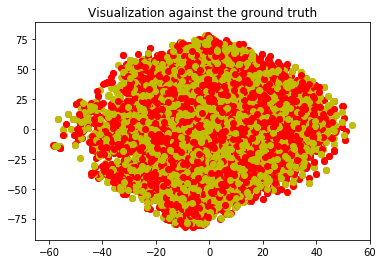

In [43]:
time_start = time.time()
pca = PCA(n_components=50, random_state = 42)
tsne_model = TSNE(random_state = 42)
for j,(img, label) in enumerate(train_loader_kmeans):
  X = img.view(-1, 3*128*128)
  X = pca.fit_transform(X)
  # X = pca.transform(X)
  print(f'TSNE started. Time collapsed = {(time.time()-time_start):.2f}s')
  tsne = tsne_model.fit_transform(X)
  # tsne = tsne_model.transform(X)
  print(f'TSNE completed. Time collapsed = {(time.time()-time_start):.2f}s')
  for i in range(len(tsne)):
    plt.scatter(tsne[i][0], tsne[i][1], c=colors[y_pred_train[i]])
  print(f'{j+1}th epoch done. Time collapsed ={time.time()-time_start}')
plt.title('Visualization against the ground truth')
plt.show()

TSNE started. Time collapsed = 14.78s
TSNE completed. Time collapsed = 14.78s
1th epoch done. Time collapsed =118.6208381652832


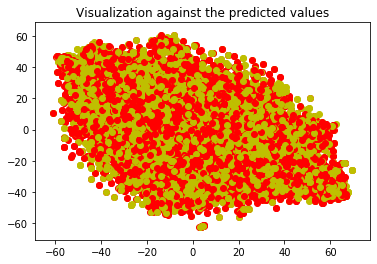

In [23]:
time_start = time.time()
# pca = PCA(n_components=50, random_state = 42)
# tsne_model = TSNE(random_state = 42)
for j,(img, label) in enumerate(train_loader_kmeans):
  X = img.view(-1, 3*128*128)
  # X = pca.fit_transform(X)
  X = pca.transform(X)
  print(f'TSNE started. Time collapsed = {(time.time()-time_start):.2f}s')
  # tsne = tsne_model.fit_transform(X)
  # tsne = tsne_model.
  print(f'TSNE completed. Time collapsed = {(time.time()-time_start):.2f}s')
  for i in range(len(tsne)):
    plt.scatter(tsne[i][0], tsne[i][1], c=colors[y_pred_train[i]])
  print(f'{j+1}th epoch done. Time collapsed ={time.time()-time_start}')
plt.title('Visualization against the predicted values')
plt.show()